# Tarea 1

Integrantes: Pedro Valenzuela González 202023009-9 




## 2.a) Límites admisibles operacionales para el estudio 

### Referente Articulo 5-19 (Shunt)

Tensión nominal Barrras

    -Igual o superior a 500 [kV] =  0,97 y 1,03 por unidad  

    -Igual o superior a 200 [kV] e inferior a 500 [kV] =  0,95 y 1,05 por unidad

    - Inferior a 200 [kV] = 0,93 y 1,07 por unidad

### Referente Articulo 5-23 (Estado de alerta)

    -Igual o superior a 500 [kV] = 0,95 y 1,05 por unidad

    -Igual o superior a 200 [kV] e inferior a 500 [kV] =  0,93 y 1,07 por unidad

    -Inferior a 200 [kV] = 0,90 y 1,10 por unidad

## 2.b) Modelamiento de Parametros concentrados:



Modelo π parametros concentrados

<div>
<img src="modelo.png" width="300"/>
</div>



In [45]:
# Matriz ABCD Línea larga
import numpy as np

Z1= 0.02+0.115j
Y1= 0+1.5708*10**(-6)*1j
l=500

Z= Z1*l
Y= Y1*l

gamma= np.sqrt(Z1*Y1) 
Zc= np.sqrt(Z1/Y1)

print("gamma=", gamma)
print("Zc=", Zc)

x=gamma*l
Zp= Z * (np.sinh(x))/x
Yp= Y * (np.tanh(x/2))/(x/2)

#A= 1+(Y*Z)/2
#B= Z
#C= Y*(1+((Y*Z)/4))
#D= A

A= 1+(x**2)/2
B= Zc*(x+(x**3)/6)
C= (x+(x**3)/6)/Zc
D=A

print("Zp =", Zp)
print("Yp =", Yp)

print("A =", A)
print("B =", B)
print("C =", C)
print("D =", D)



gamma= (3.68203487226889e-05+0.00042661192913473527j)
Zc= (271.5889541219349-23.44050720823078j)
Zp = (9.849969018914091+57.08118958817185j)
Yp = (5.187188937454493e-07+0.0007883687550247962j)
A = (0.97741975+0.003926999999999999j)
B = (9.849465+57.080301875j)
C = (-1.0280886000000084e-06+0.00077948849055j)
D = (0.97741975+0.003926999999999999j)


### -Diferencias con modelo de párametros distribuidos: 
        Los parámetros concentrados confinan los efectos totales de la línea a una región pequeña del espacio. Por otro lado, los parámetros distribuidos se refieren a variables que están distribuidas espacialmente, destacándose la variabilidad de la impedancia serie, característica que no se observa en los parámetros concentrados.

        -La librería escogida trabaja el modelo de parametros concentrados 


### Figura 1(a)
<div>
<img src="Figura a.png" width="300"/>
</div>


## 3.a) Comportamiento de la tensión para una carga que varía en el rango de +-50%

### Código y figura 

      name  vn_kv type  zone  in_service
0  Barra 1  500.0    b  None        True
1  Barra 2  500.0    b  None        True
      name std_type  from_bus  to_bus  length_km  r_ohm_per_km  x_ohm_per_km  \
0  Línea 1  linea_a         0       1      500.0          0.02         0.115   

   c_nf_per_km  g_us_per_km  max_i_ka   df  parallel type  in_service  
0         19.1          0.0       1.0  1.0         2  NaN        True  
Tensión receptor= [1.0490783862373625, 1.0480882621559247, 1.047094687822527, 1.0460976373455344, 1.045097084488373, 1.0440930026631317, 1.0430853649240137, 1.042074143960626, 1.0410593120911094, 1.0400408412550985, 1.0390187030065106, 1.0379928685061557, 1.036963308514162, 1.0359299933822173, 1.034892893045607, 1.0338519770150612, 1.0328072143683875, 1.0317585737418935, 1.030706023321589, 1.0296495308341613, 1.0285890635377137, 1.027524588212267, 1.0264560711500073, 1.0253834781452782, 1.024306774484306, 1.0232259249346527, 1.0221408937343819, 1.0210516445809352, 1

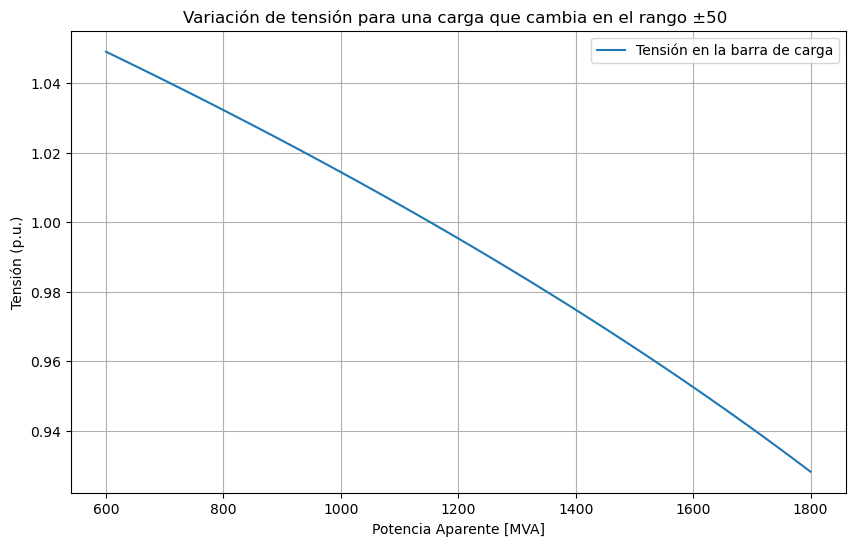

In [46]:
import pandapower as pp
import pandapower.plotting.plotly as plotly
import matplotlib.pyplot as plt
import numpy as np


net = pp.create_empty_network()
bus1 = pp.create_bus(net, name="Barra 1", vn_kv=500, type="b")
bus2 = pp.create_bus(net, name="Barra 2", vn_kv=500, type="b")

# mostrar tabla con barras
print(net.bus)

#Creando linea
linea_a= {"r_ohm_per_km": 0.02, "x_ohm_per_km": 0.115, "c_nf_per_km": 19.1, "max_i_ka": 1}
pp.create_std_type(net, name="linea_a", data=linea_a, element="line")
pp.available_std_types(net, element="line")

# Línea
line1 = pp.create_line(net, from_bus=bus1, to_bus=bus2, length_km=500, std_type="linea_a", name="Línea 1", parallel=2)

print(net.line)


# Añadir una fuente externa
pp.create_ext_grid(net, bus1, vm_pu=1, name="Grid Connection")


#------------Variando la carga------------------ 

# Crear una carga en la barra 2
p_mw_inicial = 1080
q_mvar_inicial = 523.03
pp.create_load(net, bus2, p_mw=p_mw_inicial, q_mvar=q_mvar_inicial, name="Carga")

# Variar la potencia activa y reactiva
p_mw_min = p_mw_inicial * 0.5
p_mw_max = p_mw_inicial * 1.5
q_mvar_min = q_mvar_inicial * 0.5
q_mvar_max = q_mvar_inicial * 1.5
p_mw_range = np.linspace(p_mw_min, p_mw_max, num=100)
q_mvar_range = np.linspace(q_mvar_min, q_mvar_max, num=100)

# Listas para almacenar
potencias_aparentes = []
voltages = []

for p_mw, q_mvar in zip(p_mw_range, q_mvar_range):
    net.load.loc[0, 'p_mw'] = p_mw
    net.load.loc[0, 'q_mvar'] = q_mvar
    pp.runpp(net, max_iteration=2000, tolerance_mva=1*10**(-10))
    # Guardar la tensión en el bus de la carga
    voltages.append(net.res_bus.vm_pu[bus2])
    s_mva = np.sqrt(p_mw**2 + q_mvar**2)
    potencias_aparentes.append(s_mva)

print("Tensión receptor=", voltages)
print("Pot aparente=", potencias_aparentes)
plt.figure(figsize=(10, 6))
plt.plot(potencias_aparentes, voltages, label='Tensión en la barra de carga')
plt.xlabel('Potencia Aparente [MVA]')
plt.ylabel('Tensión (p.u.)')
plt.title('Variación de tensión para una carga que cambia en el rango ±50 ')
plt.legend()
plt.grid(True)
plt.show()


#### Justificación teórica

Es razonable que, a mayor potencia consumida por la carga, mayor sea la caída de tensión, ya que aumenta la demanda de corriente en el sistema.

## 3.b) Compensación

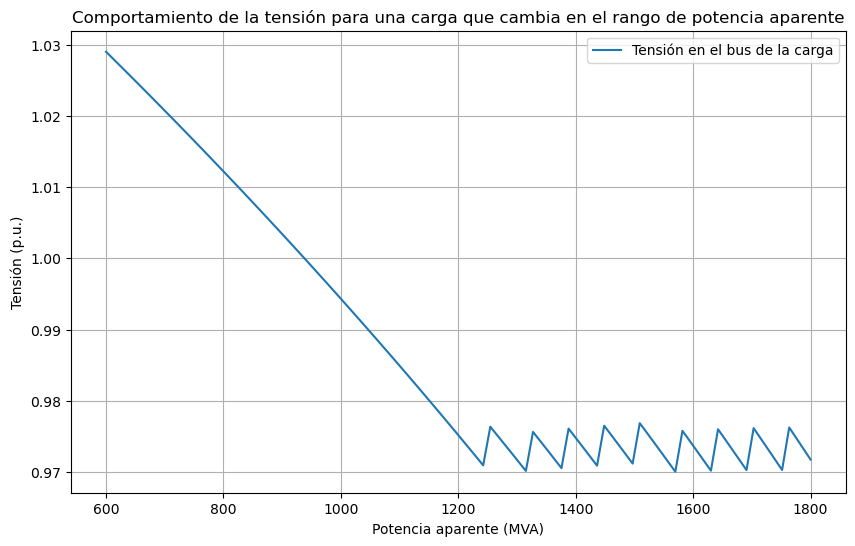

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandapower as pp

s_range= np.linspace(600,1800, num=100)
# Crear una figura para la gráfica
plt.figure(figsize=(10, 6))

# Lista para guardar los valores de compensación
compensation_values = []

# Lista para guardar las tensiones
voltages = []

# Para cada rango de potencia aparente
for i, s_value in enumerate(s_range):
    # Lista para guardar los valores de compensación para cada s en el rango
    compensation_values_for_range = []

    # Crear compensación shunt
    compensation_value = 0  # Valor inicial de compensación en Mvar
    pp.create_shunt(net, bus=bus2, q_mvar=compensation_value, p_mw=0, name=f"Compensacion_{i}")

    # Calcular la nueva potencia activa y reactiva
    p = s_value * fp
    q = np.sqrt(s_value**2 - p**2)
    
    # Actualizar la carga en la red
    net.load.loc[0, 'p_mw'] = p
    net.load.loc[0, 'q_mvar'] = q

    # Ajustar la compensación hasta que la tensión esté en el rango [0.97, 1.03]
    while True:
        # Ejecutar una simulación de flujo de potencia
        pp.runpp(net, max_iteration=2000, tolerance_mva=1e-9)
        
        # Verificar si la tensión está en el rango [0.97, 1.03]
        if 0.97 <= net.res_bus.vm_pu[bus2] <= 1.03:
            break
        
        # Ajustar la compensación
        if net.res_bus.vm_pu[bus2] < 0.97:
            # Necesita compensación capacitiva, ajustar en pasos de 10 Mvar
            compensation_value -= 50
        elif net.res_bus.vm_pu[bus2] > 1.03:
            # Necesita compensación inductiva, ajustar en pasos de 10 Mvar
            compensation_value += 50
        
        # Actualizar la compensación en la red
        net.shunt.loc[i, 'q_mvar'] = compensation_value

    # Guardar la tensión en el bus de la carga
    voltages.append(net.res_bus.vm_pu[bus2])
    
    # Guardar el valor de compensación para este s
    compensation_values_for_range.append(compensation_value)

    # Guardar los valores de compensación para este rango
    compensation_values.append(compensation_values_for_range)

# Graficar la tensión en función de la potencia aparente
plt.plot(s_range, voltages, label=f'Tensión en el bus de la carga')

# Configurar la gráfica
plt.xlabel('Potencia aparente (MVA)')
plt.ylabel('Tensión (p.u.)')
plt.title('Comportamiento de la tensión para una carga que cambia en el rango de potencia aparente')
plt.legend()
plt.grid(True)
plt.show()



## 3.c) Pérdidas de línea para rango de pot deman y rango de comp 

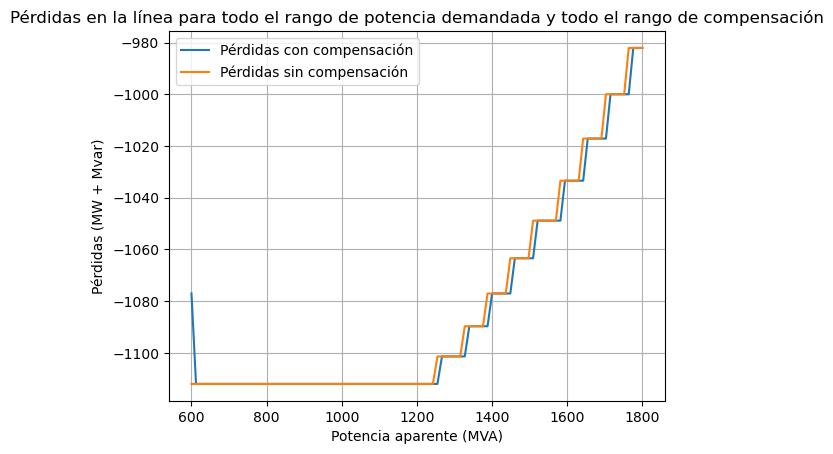

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Crear listas para guardar las pérdidas y las pérdidas sin compensación
losses = []
losses_without_compensation = []

# Para cada rango de potencia aparente
for i, s_value in enumerate(s_range):
    # Para cada valor de compensación
    for compensation_value in compensation_values[i]:
        # Actualizar la compensación en la red
        net.shunt.loc[i, 'q_mvar'] = compensation_value

        # Ejecutar una simulación de flujo de potencia
        pp.runpp(net, max_iteration=2000, tolerance_mva=1e-9)

        # Calcular las pérdidas en la línea
        loss = sum(net.res_line.pl_mw + net.res_line.ql_mvar)
        losses.append(loss)

        # Calcular las pérdidas sin compensación
        net.shunt.loc[i, 'q_mvar'] = 0
        pp.runpp(net, max_iteration=2000, tolerance_mva=1e-9)
        loss_without_compensation = sum(net.res_line.pl_mw + net.res_line.ql_mvar)
        losses_without_compensation.append(loss_without_compensation)

# Convertir las listas a arrays de numpy para poder graficarlas
losses = np.array(losses)
losses_without_compensation = np.array(losses_without_compensation)

# Crear la figura
plt.figure()

# Graficar las pérdidas con compensación
plt.plot(s_range, losses, label='Pérdidas con compensación')

# Graficar las pérdidas sin compensación
plt.plot(s_range, losses_without_compensation, label='Pérdidas sin compensación')

# Configurar la gráfica
plt.xlabel('Potencia aparente (MVA)')
plt.ylabel('Pérdidas (MW + Mvar)')
plt.title('Pérdidas en la línea para todo el rango de potencia demandada y todo el rango de compensación')
plt.legend()
plt.grid(True)
plt.show()

### Figura b
<div>
<img src="Figura b.png" width="500"/>
</div>


## 4.a) Identificar líneas saturadas o fuera de norma

### Gráfico Estado líneas

In [82]:

import numpy as np
import scipy as sp
import numba as nb
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandapower as power
from pandapower import networks, topology, plotting, converter, estimation

network = power.create_empty_network()

# Create buses
bus1 = power.create_bus(network, vn_kv=110, name="Bus 1")
bus2 = power.create_bus(network, vn_kv=220, name="Bus 2")
bus1a = power.create_bus(network, vn_kv=220, name="Bus 1a")
bus2a = power.create_bus(network, vn_kv=220, name="Bus 2a")
bus3a = power.create_bus(network, vn_kv=220, name="Bus 3a")
bus1b = power.create_bus(network, vn_kv=220, name="Bus 1b")
bus2b = power.create_bus(network, vn_kv=220, name="Bus 2b")

bus_indices = [bus1,bus2,bus1a,bus2a,bus3a,bus1b,bus2b]

# Define an approximate line type for "N2XS(FL)2Y 1x185 RM/35 64/110 kV"
line_type = "N2XS(FL)2Y 1x185 RM/35"
power.create_std_type(network, {
    "c_nf_per_km": 250,  # Approximate capacitance in nF per km
    "r_ohm_per_km": 0.1,  # Approximate resistance in ohms per km
    "x_ohm_per_km": 0.15,  # Approximate reactance in ohms per km
    "max_i_ka": 0.4,  # Approximate maximum current in kA
    "type": "ol"  # Line type: 'ol' for overhead line
}, name=line_type)

# Create lines between buses
line1=power.create_line(network, from_bus=bus2, to_bus=bus1a, length_km=10, std_type=line_type, name="Line 1")
line2=power.create_line(network, from_bus=bus2, to_bus=bus1b, length_km=10, std_type=line_type, name="Line 2")
line3=power.create_line(network, from_bus=bus1a, to_bus=bus2a, length_km=15, std_type=line_type, name="Line 3")
line4=power.create_line(network, from_bus=bus2a, to_bus=bus3a, length_km=20, std_type=line_type, name="Line 4")
line5=power.create_line(network, from_bus=bus3a, to_bus=bus2b, length_km=15, std_type=line_type, name="Line 5")
line6=power.create_line(network, from_bus=bus2b, to_bus=bus1b, length_km=30, std_type=line_type, name="Line 6")

line_indices = [line1, line2, line3, line4, line5, line6]

# Nominal load values
nominal_P_MW = 150
nominal_Q_MVA = 100

# Create loads
p3 = nominal_P_MW * 0.2
q3 = nominal_Q_MVA * 0.2
power.create_load(network, bus1a, p3, q3, name="Carga3")

p4 = nominal_P_MW * 0.35
q4 = nominal_Q_MVA * 0.35
power.create_load(network, bus2a, p4, q4, name="Carga4")

p5 = nominal_P_MW * 0.15
q5 = nominal_Q_MVA * 0.15
power.create_load(network, bus3a, p5, q5, name="Carga5")

p6 = nominal_P_MW * 0.6
q6 = nominal_Q_MVA * 0.6
power.create_load(network, bus1b, p6, q6, name="Carga6")

p7 = nominal_P_MW * 0.1
q7 = nominal_Q_MVA * 0.1
power.create_load(network, bus2b, p7, q7, name="Carga7")

# Create external grid and transformer
power.create_ext_grid(network, bus=bus1, vm_pu=1, name="Grid")
power.create_transformer(network, hv_bus=bus2, lv_bus=bus1, std_type="100 MVA 220/110 kV")

power.runpp(network, max_iteration=4000, tolerance_mva=1e-9)

# Run power flow
power.runpp(network, max_iteration=4000, tolerance_mva=1e-9)

# Check for overloaded lines
overloaded_lines = network.line[network.res_line.loading_percent > 100]
print("Overloaded lines:")
print(overloaded_lines)

# Plot network with overloaded lines highlighted
plotting.simple_plot(network, line_color="grey", bus_size=0.2)
plotting.draw_collections([plotting.create_line_collection(network, overloaded_lines.index, color="red", linewidths=2)], plt.gca())
plt.show()



No or insufficient geodata available --> Creating artificial coordinates. This may take some time


Overloaded lines:
     name                std_type  from_bus  to_bus  length_km  r_ohm_per_km  \
0  Line 1  N2XS(FL)2Y 1x185 RM/35         1       2       10.0           0.1   
1  Line 2  N2XS(FL)2Y 1x185 RM/35         1       5       10.0           0.1   
2  Line 3  N2XS(FL)2Y 1x185 RM/35         2       3       15.0           0.1   
5  Line 6  N2XS(FL)2Y 1x185 RM/35         6       5       30.0           0.1   

   x_ohm_per_km  c_nf_per_km  g_us_per_km  max_i_ka   df  parallel type  \
0          0.15        250.0          0.0       0.4  1.0         1   ol   
1          0.15        250.0          0.0       0.4  1.0         1   ol   
2          0.15        250.0          0.0       0.4  1.0         1   ol   
5          0.15        250.0          0.0       0.4  1.0         1   ol   

   in_service  
0        True  
1        True  
2        True  
5        True  


ImportError: Some pandapower functionality use modules outside the setup.py requirements: build_igraph_from_pp() requires 'igraph'. 
igraph could not be imported.
To install all pandapower dependencies, pip install pandapower["all"] can be used.

### Método para resolver problema 

## 4.b) Identificar si las Tensiones de las barras estan fuera de norma según ambos escenarios 

### Estado Normal

### Estado Alerta

## 4.c) 

## 4.d)

## 4.e)

## 4.f)

## 4.g)